In [178]:
import pandas as pd
import glob
import numpy as numpy
import matplotlib.pyplot as plt
from collections import defaultdict
from tqdm import tqdm
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import seaborn as sns
import holidays
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

# from keras.models import Sequential
# from keras.layers import LSTM, Dense, Bidirectional

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Read in data


In [179]:
def read_in_data():
    dict_of_stocks_and_dfs = {}
    for file_ in glob.glob('../data/updated_historical_stock_and_etf_data/*.csv'):
        stock_name = file_.rsplit("/")[-1].split('_')[0].lower() 
        print(f"Reading in {stock_name}")
        df_  = pd.read_csv(f"{file_}")
        dict_of_stocks_and_dfs[stock_name] = df_.sort_values('date')
    return dict_of_stocks_and_dfs

In [180]:
dict_of_stocks_and_dfs = read_in_data()

Reading in vti
Reading in pbj
Reading in qqq
Reading in rost
Reading in spy
Reading in so
Reading in eqix
Reading in iwm
Reading in ce
Reading in emr
Reading in atvi
Reading in vfh
Reading in peg
Reading in adbe
Reading in cern
Reading in pg
Reading in pvh
Reading in lb
Reading in pej
Reading in rop
Reading in dia
Reading in are
Reading in ph
Reading in vno
Reading in ual
Reading in efx
Reading in xrt
Reading in bac
Reading in ni
Reading in bjk
Reading in pnr


In [201]:
dict_of_stocks_and_dfs['bac']

,date,open,high,low,close,volume
834,1986-05-29,3.6107,3.6389,3.6107,3.6295,16691365
835,1986-05-30,3.6107,3.6578,3.6107,3.6578,6895475
836,1986-06-02,3.6578,3.6768,3.6295,3.6485,333487
837,1986-06-03,3.6389,3.6768,3.6295,3.6768,163776
838,1986-06-04,3.6485,3.6768,3.6204,3.6204,203654
...,...,...,...,...,...,...
830,2020-04-21,21.9000,22.3700,21.5000,21.6400,78871343
831,2020-04-22,22.1600,22.2300,21.7500,21.8000,49759122
832,2020-04-23,21.9600,22.3900,21.8500,21.8700,50614823
833,2020-04-24,22.1100,22.3000,21.6700,22.1800,47675736


In [200]:
 build_correlation_dfs(dict_of_stocks_and_dfs, verbose=False)['bac']

/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if sys.path[0] == '':



Finished 0.0 pct of stocks



KeyboardInterrupt: 

In [181]:
# key is company value is df of data
dict_of_stocks_and_dfs.keys()

dict_keys(['vti', 'pbj', 'qqq', 'rost', 'spy', 'so', 'eqix', 'iwm', 'ce', 'emr', 'atvi', 'vfh', 'peg', 'adbe', 'cern', 'pg', 'pvh', 'lb', 'pej', 'rop', 'dia', 'are', 'ph', 'vno', 'ual', 'efx', 'xrt', 'bac', 'ni', 'bjk', 'pnr'])

In [182]:
len(dict_of_stocks_and_dfs)

31

In [183]:
dict_of_stocks_and_dfs['pnr'].date.max()

'2020-04-27'

In [184]:
dict_of_stocks_and_dfs['qqq'].date.min()

'1999-03-10'

In [185]:
dict_of_stocks_and_dfs['qqq'].date.max()

'2020-04-27'

# Create correlation & variance features
- Daily, weekly, 30-days, 90-days, 180-days, 365-daysreturn

In [159]:

# here the date is not the index, yet
first_stock_df = dict_of_stocks_and_dfs['ph'].loc[ dict_of_stocks_and_dfs['ph'].date.isin(dict_of_stocks_and_dfs['emr'].date), :]

In [160]:
np.var(first_stock_df.close)

2632.50546526785

In [161]:
dict_of_stocks_and_dfs['ph'][dict_of_stocks_and_dfs['ph'].date == '2017-01-02']

,date,open,high,low,close,volume


## Set the date as the index and sort

In [162]:
first_stock_df = first_stock_df.sort_values('date')
second_stock_df = second_stock_df.sort_values('date')

first_stock_df = first_stock_df.set_index('date')
second_stock_df = second_stock_df.set_index('date')

NameError: name 'second_stock_df' is not defined

In [163]:
#pd.DataFrame(
first_stock_df.volume.rolling(7).std()[:10] # .fillna(method='backfill').astype(int))

834              NaN
835              NaN
836              NaN
837              NaN
838              NaN
839              NaN
840     95419.697574
841     93678.013509
842    217940.467100
843    232513.207094
Name: volume, dtype: float64

In [164]:
corr_df = pd.DataFrame(first_stock_df.close.rolling(7).corr(second_stock_df.close)).fillna(method='backfill').rename({'close': 'rolling_corr'},axis=1)

NameError: name 'second_stock_df' is not defined

In [165]:
corr_df

NameError: name 'corr_df' is not defined

In [166]:
first_stock_df.index.max()

8775

In [167]:
second_stock_df.index.max()

NameError: name 'second_stock_df' is not defined

In [168]:
np.corrcoef(first_stock_df.close, second_stock_df.close) # all time corrcoef

NameError: name 'second_stock_df' is not defined

NameError: name 'second_stock_df' is not defined

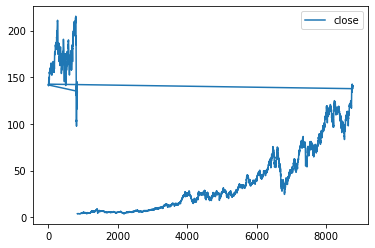

In [169]:

ax = first_stock_df.plot(y='close')
second_stock_df.plot(y='close', color='red', ax=ax)

In [170]:
correlation_df.info()

NameError: name 'correlation_df' is not defined

In [171]:
correlation_df.set_index('date').plot(figsize=(30,5), title='Rolling 365-day correlation between ph and emr')

NameError: name 'correlation_df' is not defined

In [172]:
dict_of_stocks_and_dfs['cern'].groupby('date').count().sort_values(by='volume', ascending=True)

,open,high,low,close,volume
date,,,,,
2005-02-25,1,1,1,1,1
2015-03-26,1,1,1,1,1
2015-03-27,1,1,1,1,1
2015-03-30,1,1,1,1,1
2015-03-31,1,1,1,1,1
...,...,...,...,...,...
2010-03-24,1,1,1,1,1
2010-03-25,1,1,1,1,1
2010-03-26,1,1,1,1,1


## Build a function to create correlation features for all pairs of stocks

In [186]:
def build_correlation_dfs(dict_of_stocks_and_dfs, n_day_rolling_features_list=[ 3, 5, 7, 10, 30, 180, 365], verbose=False):
    """
    Create correlation + variance based  upon daily closing stock prices for given date ranges
    
    also include daily volume
    
    We are trying to  predict 7 day correaltion
    """

    stock_features_dict = defaultdict(pd.DataFrame)
    start_time = time.time()
    
    start = time.time()
    n_stocks = len(dict_of_stocks_and_dfs.keys())
    final_feature_df = create_date_dummy_df()
    pairs_of_stocks = []
    
    for idx, first_stock_name in enumerate(dict_of_stocks_and_dfs.keys()):
        print('')
        print(f"Finished {idx/n_stocks} pct of stocks")
        print('')
        for second_idx, second_stock_name in enumerate(dict_of_stocks_and_dfs.keys()):
            stock_pair = f"{first_stock_name}_{second_stock_name}"
            reverse_pair = f"{second_stock_name}_{first_stock_name}"
            
            if (first_stock_name == second_stock_name) or (stock_pair in pairs_of_stocks)  or (reverse_pair in pairs_of_stocks): # pnr -> ual same as ual -> pnr
                continue
            else:
                pairs_of_stocks.append(stock_pair)
            if verbose:
                print('-------')
                print(f"{first_stock_name} & {second_stock_name}")
                print('-------')
            
            # here the date is not the index, yet
            first_stock_df = dict_of_stocks_and_dfs[f"{first_stock_name}"].loc[ 
                dict_of_stocks_and_dfs[f"{first_stock_name}"].date.isin(dict_of_stocks_and_dfs[f"{second_stock_name}"].date), :]

            #  filter second df by the dates in first

            # here the date is not the index, yet
            second_stock_df = dict_of_stocks_and_dfs[f"{second_stock_name}"].loc[ 
                dict_of_stocks_and_dfs[f"{second_stock_name}"].date.isin(first_stock_df.date), :]
            
            # set the date as an index and sort by date
            first_stock_df = first_stock_df.sort_values('date')
            second_stock_df = second_stock_df.sort_values('date')

            first_stock_df = first_stock_df.set_index('date')
            second_stock_df = second_stock_df.set_index('date')
            
            all_features_df = pd.DataFrame()
            for rolling_idx, rolling_day in enumerate(n_day_rolling_features_list):
                if verbose:
                    print(f"Rolling calculations for {rolling_day}")
                features_df = create_correlation_and_variance_features(
                    first_stock_df, second_stock_df, rolling_day, final_feature_df, 
                    first_stock_name=first_stock_name, second_stock_name=second_stock_name)
                   
                current_feature_cols = set(features_df.columns)
                final_feature_cols = set(final_feature_df.columns)

                
                if (f"{first_stock_name}_volume" not in final_feature_df.columns) and (rolling_idx == 0):
                    features_df[f"{first_stock_name}_volume"] = list(first_stock_df.volume)
                
                if (f"{second_stock_name}_volume" not in final_feature_df.columns) and (rolling_idx == 0):
                    features_df[f"{second_stock_name}_volume"] = list(second_stock_df.volume)
                    
                if rolling_idx == 0: 
                    all_features_df = features_df
                else:
                    all_features_df = all_features_df.join(features_df, on='date', lsuffix='_left')
            

                    
            all_features_df.index = pd.to_datetime(all_features_df.index)
            final_feature_df = final_feature_df.join(all_features_df, on='date')

            if verbose:
                end = time.time()
                print(f"Building all features took {(end-start)/60} minutes")
                start = time.time()

    end_time = time.time()
    print(f"Total time {(end_time-start_time) / 60} minutes for {len(pairs_of_stocks)} pairs")
    final_feature_df = add_time_feature(final_feature_df)
    return final_feature_df, pairs_of_stocks
            
        

# Note: will eventuall need to add in 0s for stocks withour correlation data with other stocks due to date range

In [187]:
def create_date_dummy_df(start_date=datetime.datetime(1980,1,1), n_years=50):
    
    #  create dummy df with dates to join against
    list_of_dates  = []
    n_days = 365*n_years
    start_date = start_date

    for i in range(n_days):
        list_of_dates.append(start_date + datetime.timedelta(i))
    df_ = pd.DataFrame(list_of_dates, columns=['date'])
    
    df_.date_ =  pd.to_datetime(df_.date)
    return df_.set_index('date')
    

In [188]:
def add_time_feature(final_stock_df):
    
    days = [i.day for i in final_stock_df.index]
    months = [i.month for i in final_stock_df.index]
    quarters = [i.quarter for i in final_stock_df.index]
    years = [i.year for i in final_stock_df.index]
    
    us_holidays = holidays.UnitedStates()
    
    h_ = np.array([i in us_holidays for i in final_stock_df.index]).astype(int)


    final_stock_df['day'] = days
    final_stock_df['month'] = months
    final_stock_df['quarter'] = quarters
    final_stock_df['year'] = years
    final_stock_df['is_holiday'] = h_
    
    return final_stock_df

In [189]:
def create_correlation_and_variance_features(first_stock_df, second_stock_df, n_days_stride, final_stock_df, 
                                             first_stock_name=None, second_stock_name=None, verbose=False):
    """
    n_days_stride: the  number of rolling days to calculate correlation for
    """
    n_rows = len(first_stock_df)

    previous_row = 0

    features_per_time_period = defaultdict(list)
    if verbose:
        print(f"Creating correlations + variance on close for {n_days_stride} days")
    
    rolling_close_df = pd.DataFrame(first_stock_df.close.rolling(
        n_days_stride).corr(second_stock_df.close)).rename(
        {'close': f"{first_stock_name}_{second_stock_name}_close_corr_rolling_{n_days_stride}_days"},axis=1).fillna(method='backfill').round(6)

    
    # add cols
    
    current_feature_cols = list(final_stock_df.columns)
    

    # as we go through different pairs will have multiple var / corr for the first stock
    # pnc_bar calcualtes corr for pnr
    #pnr_bat calculates corr for pnr
    # don't want the same cols
    if f"{first_stock_name}_close_std_rolling_{n_days_stride}_days" not in current_feature_cols:
        
        rolling_close_std_first_stock =  first_stock_df.close.rolling(n_days_stride).std().fillna(method='backfill').round(6)
        rolling_close_df[f"{first_stock_name}_close_std_rolling_{n_days_stride}_days"] = rolling_close_std_first_stock
        
    if f"{second_stock_name}_close_std_rolling_{n_days_stride}_days" not in current_feature_cols:
        rolling_close_std_second_stock =  second_stock_df.close.rolling(n_days_stride).std().fillna(method='backfill').round( 6)
        rolling_close_df[f"{second_stock_name}_close_std_rolling_{n_days_stride}_days"] = rolling_close_std_second_stock
        
    if f"{first_stock_name}_volume_std_rolling_{n_days_stride}_days" not in current_feature_cols:
        rolling_volume_std_first_stock =  first_stock_df.volume.rolling(n_days_stride).std().fillna(method='backfill').round(6)
        rolling_close_df[f"{first_stock_name}_volume_std_rolling_{n_days_stride}_days"] = rolling_volume_std_first_stock
        
    if f"{second_stock_name}_volume_std_rolling_{n_days_stride}_days" not in current_feature_cols:
        rolling_volume_std_second_stock =  second_stock_df.volume.rolling(n_days_stride).std().fillna(method='backfill').round(6)
        rolling_close_df[f"{second_stock_name}_volume_std_rolling_{n_days_stride}_days"] = rolling_volume_std_second_stock
    
    return rolling_close_df



In [202]:
test_df, pai = build_correlation_dfs(dict_of_stocks_and_dfs, verbose=True)

/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if sys.path[0] == '':



Finished 0.0 pct of stocks

-------
vti & pbj
-------
Rolling calculations for 3
Rolling calculations for 5
Rolling calculations for 7
Rolling calculations for 10
Rolling calculations for 30
Rolling calculations for 180
Rolling calculations for 365
Building all features took 0.0034358461697896322 minutes
-------
vti & qqq
-------
Rolling calculations for 3
Rolling calculations for 5
Rolling calculations for 7
Rolling calculations for 10
Rolling calculations for 30
Rolling calculations for 180
Rolling calculations for 365
Building all features took 0.002283314863840739 minutes
-------
vti & rost
-------
Rolling calculations for 3
Rolling calculations for 5
Rolling calculations for 7
Rolling calculations for 10
Rolling calculations for 30
Rolling calculations for 180
Rolling calculations for 365
Building all features took 0.002280302842458089 minutes
-------
vti & spy
-------
Rolling calculations for 3
Rolling calculations for 5
Rolling calculations for 7
Rolling calculations for 10
Rol

KeyboardInterrupt: 

In [191]:
# 2 minutes fo 210 pairs
final_stock_df, pairs_of_stocks = build_correlation_dfs(dict_of_stocks_and_dfs, verbose=False)

/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if sys.path[0] == '':



Finished 0.0 pct of stocks


Finished 0.03225806451612903 pct of stocks


Finished 0.06451612903225806 pct of stocks


Finished 0.0967741935483871 pct of stocks


Finished 0.12903225806451613 pct of stocks


Finished 0.16129032258064516 pct of stocks


Finished 0.1935483870967742 pct of stocks


Finished 0.22580645161290322 pct of stocks


Finished 0.25806451612903225 pct of stocks


Finished 0.2903225806451613 pct of stocks


Finished 0.3225806451612903 pct of stocks


Finished 0.3548387096774194 pct of stocks


Finished 0.3870967741935484 pct of stocks


Finished 0.41935483870967744 pct of stocks


Finished 0.45161290322580644 pct of stocks


Finished 0.4838709677419355 pct of stocks


Finished 0.5161290322580645 pct of stocks


Finished 0.5483870967741935 pct of stocks


Finished 0.5806451612903226 pct of stocks


Finished 0.6129032258064516 pct of stocks


Finished 0.6451612903225806 pct of stocks


Finished 0.6774193548387096 pct of stocks


Finished 0.7096774193548387 pct of sto

In [192]:
len(final_stock_df.columns)

3725

In [1423]:
final_stock_df[~pd.isna(final_stock_df.pnr_bac_close_corr_rolling_3_days)]

,eqix_rost_close_corr_rolling_3_days,eqix_close_std_rolling_3_days,rost_close_std_rolling_3_days,eqix_volume_std_rolling_3_days,rost_volume_std_rolling_3_days,eqix_volume,rost_volume,eqix_rost_close_corr_rolling_6_days,eqix_close_std_rolling_6_days,rost_close_std_rolling_6_days,...,bac_ni_close_corr_rolling_30_days,bac_ni_close_corr_rolling_60_days,bac_ni_close_corr_rolling_90_days,bac_ni_close_corr_rolling_180_days,bac_ni_close_corr_rolling_365_days,day,month,quarter,year,is_holiday
date,,,,,,,,,,,,,,,,,,,,,
2005-02-25,-0.674725,0.227786,0.034755,34417.241396,1.370540e+06,101044.0,4053375.0,0.815942,0.955232,0.247500,...,0.472253,0.208729,0.332521,0.713070,0.600343,25,2,1,2005,0
2005-02-28,-0.674725,0.227786,0.034755,34417.241396,1.370540e+06,157510.0,3504738.0,0.815942,0.955232,0.247500,...,0.468663,0.230703,0.317359,0.713723,0.601679,28,2,1,2005,0
2005-03-01,-0.674725,0.227786,0.034755,34417.241396,1.370540e+06,163370.0,6104866.0,0.815942,0.955232,0.247500,...,0.509679,0.251617,0.296525,0.714306,0.603787,1,3,1,2005,0
2005-03-02,0.155460,0.249492,0.092128,9822.208577,1.749734e+06,176678.0,6833154.0,0.815942,0.955232,0.247500,...,0.503664,0.264849,0.272528,0.713619,0.606069,2,3,1,2005,0
2005-03-03,0.944908,0.354056,0.210178,53985.128854,8.015813e+06,262816.0,20338472.0,0.815942,0.955232,0.247500,...,0.602648,0.287665,0.239791,0.712324,0.607683,3,3,1,2005,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-20,0.921834,12.100167,2.832178,10426.116454,1.245721e+06,519465.0,3565677.0,0.806622,13.560098,2.202212,...,0.785553,0.893178,0.782362,0.478982,0.468392,20,4,2,2020,0
2020-04-21,0.883428,13.572675,4.528072,52815.552637,7.638944e+05,420730.0,4154852.0,0.831760,9.717596,3.283860,...,0.813368,0.892376,0.786006,0.486588,0.472182,21,4,2,2020,0
2020-04-22,-0.308115,7.721531,1.951692,53591.032244,4.522756e+05,433979.0,3265862.0,0.586243,9.167159,3.253450,...,0.799865,0.889803,0.788002,0.490475,0.474366,22,4,2,2020,0


In [1424]:
# drop na
final_stock_df = final_stock_df.dropna()

In [1425]:
len(pairs_of_stocks)

210

In [1426]:
# last date of dtaa
last_date_of_data = '2020-04-17'

In [1427]:
final_stock_df[final_stock_df.index == last_date_of_data]

,eqix_rost_close_corr_rolling_3_days,eqix_close_std_rolling_3_days,rost_close_std_rolling_3_days,eqix_volume_std_rolling_3_days,rost_volume_std_rolling_3_days,eqix_volume,rost_volume,eqix_rost_close_corr_rolling_6_days,eqix_close_std_rolling_6_days,rost_close_std_rolling_6_days,...,bac_ni_close_corr_rolling_30_days,bac_ni_close_corr_rolling_60_days,bac_ni_close_corr_rolling_90_days,bac_ni_close_corr_rolling_180_days,bac_ni_close_corr_rolling_365_days,day,month,quarter,year,is_holiday
date,,,,,,,,,,,,,,,,,,,,,
2020-04-17,0.780499,9.816692,2.323195,87720.694094,1.496140e+06,502609.0,5081026.0,0.762826,13.356595,1.939649,...,0.822318,0.893446,0.777699,0.471441,0.465007,17,4,2,2020,0


In [1428]:
pairs_of_stocks[:10]

['eqix_rost',
 'eqix_so',
 'eqix_emr',
 'eqix_atvi',
 'eqix_ce',
 'eqix_cern',
 'eqix_peg',
 'eqix_adbe',
 'eqix_rop',
 'eqix_are']

In [1429]:
final_stock_df.loc[~pd.isna(final_stock_df.pnr_volume), :]

,eqix_rost_close_corr_rolling_3_days,eqix_close_std_rolling_3_days,rost_close_std_rolling_3_days,eqix_volume_std_rolling_3_days,rost_volume_std_rolling_3_days,eqix_volume,rost_volume,eqix_rost_close_corr_rolling_6_days,eqix_close_std_rolling_6_days,rost_close_std_rolling_6_days,...,bac_ni_close_corr_rolling_30_days,bac_ni_close_corr_rolling_60_days,bac_ni_close_corr_rolling_90_days,bac_ni_close_corr_rolling_180_days,bac_ni_close_corr_rolling_365_days,day,month,quarter,year,is_holiday
date,,,,,,,,,,,,,,,,,,,,,
2006-01-25,0.697482,0.282852,0.068850,20062.106769,3.307482e+06,235169.0,4918853.0,0.709943,0.385182,0.121731,...,0.368948,-0.512014,-0.799915,-0.225630,-0.135606,25,1,1,2006,0
2006-01-26,-0.712630,0.131936,0.025701,175816.922796,3.364882e+06,547429.0,5432737.0,0.801974,0.384777,0.111135,...,0.379214,-0.456781,-0.807436,-0.226264,-0.140600,26,1,1,2006,0
2006-01-27,0.931257,0.353271,0.048220,156472.651685,5.959368e+05,373373.0,6107119.0,0.635272,0.402604,0.058964,...,0.427250,-0.344494,-0.803128,-0.226564,-0.144211,27,1,1,2006,0
2006-01-30,0.560951,0.349257,0.057870,109960.000183,1.163736e+06,343988.0,3840744.0,0.657181,0.371951,0.060240,...,0.473339,-0.183239,-0.787769,-0.223135,-0.144993,30,1,1,2006,0
2006-01-31,0.999991,0.206297,0.094188,84712.417773,3.034216e+06,214178.0,9849079.0,0.167156,0.273997,0.064078,...,0.506812,-0.019687,-0.769228,-0.218527,-0.145200,31,1,1,2006,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-20,0.921834,12.100167,2.832178,10426.116454,1.245721e+06,519465.0,3565677.0,0.806622,13.560098,2.202212,...,0.785553,0.893178,0.782362,0.478982,0.468392,20,4,2,2020,0
2020-04-21,0.883428,13.572675,4.528072,52815.552637,7.638944e+05,420730.0,4154852.0,0.831760,9.717596,3.283860,...,0.813368,0.892376,0.786006,0.486588,0.472182,21,4,2,2020,0
2020-04-22,-0.308115,7.721531,1.951692,53591.032244,4.522756e+05,433979.0,3265862.0,0.586243,9.167159,3.253450,...,0.799865,0.889803,0.788002,0.490475,0.474366,22,4,2,2020,0


In [1430]:
final_stock_df.loc[~pd.isna(final_stock_df.pnr_volume), :]

,eqix_rost_close_corr_rolling_3_days,eqix_close_std_rolling_3_days,rost_close_std_rolling_3_days,eqix_volume_std_rolling_3_days,rost_volume_std_rolling_3_days,eqix_volume,rost_volume,eqix_rost_close_corr_rolling_6_days,eqix_close_std_rolling_6_days,rost_close_std_rolling_6_days,...,bac_ni_close_corr_rolling_30_days,bac_ni_close_corr_rolling_60_days,bac_ni_close_corr_rolling_90_days,bac_ni_close_corr_rolling_180_days,bac_ni_close_corr_rolling_365_days,day,month,quarter,year,is_holiday
date,,,,,,,,,,,,,,,,,,,,,
2006-01-25,0.697482,0.282852,0.068850,20062.106769,3.307482e+06,235169.0,4918853.0,0.709943,0.385182,0.121731,...,0.368948,-0.512014,-0.799915,-0.225630,-0.135606,25,1,1,2006,0
2006-01-26,-0.712630,0.131936,0.025701,175816.922796,3.364882e+06,547429.0,5432737.0,0.801974,0.384777,0.111135,...,0.379214,-0.456781,-0.807436,-0.226264,-0.140600,26,1,1,2006,0
2006-01-27,0.931257,0.353271,0.048220,156472.651685,5.959368e+05,373373.0,6107119.0,0.635272,0.402604,0.058964,...,0.427250,-0.344494,-0.803128,-0.226564,-0.144211,27,1,1,2006,0
2006-01-30,0.560951,0.349257,0.057870,109960.000183,1.163736e+06,343988.0,3840744.0,0.657181,0.371951,0.060240,...,0.473339,-0.183239,-0.787769,-0.223135,-0.144993,30,1,1,2006,0
2006-01-31,0.999991,0.206297,0.094188,84712.417773,3.034216e+06,214178.0,9849079.0,0.167156,0.273997,0.064078,...,0.506812,-0.019687,-0.769228,-0.218527,-0.145200,31,1,1,2006,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-20,0.921834,12.100167,2.832178,10426.116454,1.245721e+06,519465.0,3565677.0,0.806622,13.560098,2.202212,...,0.785553,0.893178,0.782362,0.478982,0.468392,20,4,2,2020,0
2020-04-21,0.883428,13.572675,4.528072,52815.552637,7.638944e+05,420730.0,4154852.0,0.831760,9.717596,3.283860,...,0.813368,0.892376,0.786006,0.486588,0.472182,21,4,2,2020,0
2020-04-22,-0.308115,7.721531,1.951692,53591.032244,4.522756e+05,433979.0,3265862.0,0.586243,9.167159,3.253450,...,0.799865,0.889803,0.788002,0.490475,0.474366,22,4,2,2020,0


In [1431]:
final_stock_df.loc[((final_stock_df.index>'2020-01-01') & (final_stock_df.index<'2021-01-01')), :][['pnr_bac_close_corr_rolling_3_days','pnr_bac_close_corr_rolling_6_days', 
                                                'pnr_bac_close_corr_rolling_8_days']].plot(figsize=(15,5))

KeyError: "['pnr_bac_close_corr_rolling_8_days'] not in index"

## Train Test Split to predict correlation over the next 7 days
- rolling evey day make a predictions about what the correlation will be for the next 7 days stock price

In [1442]:
datetime.timedelta(7)

datetime.timedelta(days=7)

- Rolling Predictions

In [196]:
# drop na
final_stock_df = final_stock_df.dropna()

In [203]:
final_stock_df

,vti_pbj_close_corr_rolling_3_days,vti_close_std_rolling_3_days,pbj_close_std_rolling_3_days,vti_volume_std_rolling_3_days,pbj_volume_std_rolling_3_days,vti_volume,pbj_volume,vti_pbj_close_corr_rolling_5_days,vti_close_std_rolling_5_days,pbj_close_std_rolling_5_days,...,bjk_pnr_close_corr_rolling_7_days,bjk_pnr_close_corr_rolling_10_days,bjk_pnr_close_corr_rolling_30_days,bjk_pnr_close_corr_rolling_180_days,bjk_pnr_close_corr_rolling_365_days,day,month,quarter,year,is_holiday
date,,,,,,,,,,,,,,,,,,,,,
2008-01-24,0.999899,0.986110,0.180877,8.388648e+05,41807.466462,3222971.0,20113.0,0.868594,0.728083,0.132794,...,0.145234,0.085425,0.241353,-0.130591,0.815712,24,1,1,2008,0
2008-01-25,1.000000,0.428743,0.072707,4.237285e+05,43415.186709,2383496.0,35984.0,0.889604,0.727907,0.130325,...,0.145234,0.085425,0.241353,-0.130591,0.815712,25,1,1,2008,0
2008-01-28,0.997025,0.624921,0.115846,7.053708e+05,8604.482611,1821345.0,33810.0,0.999158,0.863593,0.161703,...,0.145234,0.085425,0.241353,-0.130591,0.815712,28,1,1,2008,0
2008-01-29,0.754605,0.784458,0.114561,6.584981e+05,352642.600930,1070990.0,645689.0,0.750112,0.583144,0.084016,...,0.145234,0.085425,0.241353,-0.130591,0.815712,29,1,1,2008,0
2008-01-30,0.741416,0.269760,0.239013,4.810668e+05,354593.069817,1967705.0,29247.0,0.310650,0.555282,0.177802,...,0.145234,0.085425,0.241353,-0.130591,0.815712,30,1,1,2008,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-20,0.999824,1.980337,0.191398,6.108858e+05,2285.927893,5413970.0,10832.0,0.927386,1.886218,0.297741,...,0.396721,0.306035,0.888707,0.949961,0.842969,20,4,2,2020,0
2020-04-21,0.997594,3.396945,0.417413,5.635615e+05,1807.817561,6367548.0,8868.0,0.942344,2.509974,0.348956,...,0.739182,0.173201,0.867307,0.950832,0.845414,21,4,2,2020,0
2020-04-22,0.925049,2.245269,0.356791,5.435611e+05,1091.420633,6342857.0,10675.0,0.928595,2.441694,0.308107,...,0.822660,0.257951,0.830176,0.951545,0.847824,22,4,2,2020,0


In [198]:
final_stock_df.pnr_bac_close_corr_rolling_7_days

AttributeError: 'DataFrame' object has no attribute 'pnr_bac_close_corr_rolling_7_days'

- Add Keras LSTM 

In [ ]:
# prepare data for Keras
# (n_samples, n_timesteps (rows), n_features)
#The first dimension is the number of samples, in this case 7. 
# The second dimension is the number of time steps per sample, in this case 3, the value specified to the function. 
#Finally, the last dimension specifies the number of parallel time series or the number of variables, in this case 2 for the two parallel series.

# Let's say we use two years of data for n_timesteps (720 days)

In [ ]:
N_DAY_TIMESTEPS = 720 #n days

In [1452]:
# prepare the data for LSTM model
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [1453]:
def build_keras_model(n_steps, n_features):
    model = Sequential()
    model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

In [1463]:
# final_stock_df[:, ['close_corr_rolling_7_days' in i  for i in final_stock_df.columns]]

In [242]:
def evaluate_predictions_on_rolling_historical_data(final_stock_df, rolling_window = 7, starting_date_index= 3000,
                                                   y_col='vti_pbj_close_corr_rolling_7_days'):
    """
    Backtesting
    
    For now, assumes the final_stock only has pairs the one start stock and all others, pnc_bac, pnc_bar ...etc
    """
    
    predicted_corr_7_days = []
    actual = []
    rmse_corr_7_days = []
    prediction_date = []

    print_idx = 5
     # otherwise, takes too long
    start = time.time()

    final_row = None
    print(len(final_stock_df))
    for date_idx, date in enumerate(list(final_stock_df.index)[starting_date_index:]):
#         print((date_id + starting_date_index+rolling_window+1))
#         print(len(final_stock_df))

        if final_row:
            break
        if (date_idx + starting_date_index +rolling_window +1) == len(final_stock_df): # last row
            final_row = True
            # need to use the dates from the DF due to weekends
            train_dates = final_stock_df.index[:starting_date_index+date_idx]
            # The test is the rolling 7-day corr looking back the past seven days
            # Therefore, the test_date should be seven dates ahead of the data we are training on

            test_date = final_stock_df.index[starting_date_index+rolling_window+date_idx]

        else:
            # need to use the dates from the DF due to weekends
            train_dates = final_stock_df.index[:starting_date_index+date_idx+1]
            # The test is the rolling 7-day corr looking back the past seven days
            # Therefore, the test_date should be seven dates ahead of the data we are training on

            test_date = final_stock_df.index[starting_date_index+rolling_window+date_idx+1]


        prediction_date.append(test_date)

        if date_idx % print_idx == 0:
            print(f"Train dates =  {train_dates}")
            print(F"Prediction date = {test_date}")

        train_df = final_stock_df[final_stock_df.index.isin(list(train_dates))]
        test_df = final_stock_df[final_stock_df.index == test_date]
        
        # put data in the past for prediction X
        test_X_df = final_stock_df.shift(-7).fillna(method='ffill') 
        test_X_df= test_X_df[test_X_df.index == test_date]


        # TODO - search for the rolling 7-days column, don't hardcode
        X_train, y_train = train_df.loc[:, train_df.columns != f"{y_col}"],  train_df[f"{y_col}"].shift(-7).fillna(method='ffill') 
        X_test, y_test = test_X_df.loc[:, test_X_df.columns != f"{y_col}"],  test_df[f"{y_col}"]
        
        # inf
        X_train = np.nan_to_num(X_train.astype(np.float32)) # converting to float 32 throws some infinity errors
        X_test = np.nan_to_num(X_test.astype(np.float32)) # converting to float 32 throws some infinity errors        
        
        
        # standard scaler for cols
        scaler=StandardScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)


        # Make an instance of the Model
        # only train on train_x and transform both train an test

        pca = PCA(n_components=15, whiten=True)
        pca.fit(X_train)
        X_train = pca.transform(X_train)
        X_test = pca.transform(X_test)



        #estimator = GradientBoostingRegressor()
        #estimator = RandomForestRegressor(n_jobs=-1)
        estimator = SVR(C=1.0)

        estimator.fit(X_train, y_train)

        prediction = estimator.predict(X_test)

        predicted_corr_7_days.append(prediction[0])
        actual.append(y_test.values[0])

        rmse_corr_7_days.append(np.sqrt(mean_squared_error(y_test, prediction)))
        if date_idx % print_idx == 0:
            print('prediction = ', prediction)
            print('actual =', y_test.values)
            print('')


    end = time.time()

    print(f"Predictions took {(end-start)/60} minutes")
    
    prediction_df = pd.DataFrame( {'actual_corr_7_days':actual, 'predicted_corr_7_days': predicted_corr_7_days, 
                                   'prediction_date':prediction_date, 'rmse_corr_7_days':rmse_corr_7_days})
    print('here')
    return prediction_df

In [ ]:
hist_predictions_df = evaluate_predictions_on_rolling_historical_data(final_stock_df)

3063
Train dates =  DatetimeIndex(['2008-01-24', '2008-01-25', '2008-01-28', '2008-01-29',
               '2008-01-30', '2008-01-31', '2008-02-01', '2008-02-04',
               '2008-02-05', '2008-02-06',
               ...
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-21', '2020-01-22', '2020-01-23',
               '2020-01-24', '2020-01-27'],
              dtype='datetime64[ns]', name='date', length=3001, freq=None)
Prediction date = 2020-02-06 00:00:00


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


prediction =  [0.49045661]
actual = [0.297631]



/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Train dates =  DatetimeIndex(['2008-01-24', '2008-01-25', '2008-01-28', '2008-01-29',
               '2008-01-30', '2008-01-31', '2008-02-01', '2008-02-04',
               '2008-02-05', '2008-02-06',
               ...
               '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
               '2020-01-31', '2020-02-03'],
              dtype='datetime64[ns]', name='date', length=3006, freq=None)
Prediction date = 2020-02-13 00:00:00


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


prediction =  [0.68990227]
actual = [0.934321]



/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Train dates =  DatetimeIndex(['2008-01-24', '2008-01-25', '2008-01-28', '2008-01-29',
               '2008-01-30', '2008-01-31', '2008-02-01', '2008-02-04',
               '2008-02-05', '2008-02-06',
               ...
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-10'],
              dtype='datetime64[ns]', name='date', length=3011, freq=None)
Prediction date = 2020-02-21 00:00:00


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


prediction =  [0.51316178]
actual = [0.026679]



/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Train dates =  DatetimeIndex(['2008-01-24', '2008-01-25', '2008-01-28', '2008-01-29',
               '2008-01-30', '2008-01-31', '2008-02-01', '2008-02-04',
               '2008-02-05', '2008-02-06',
               ...
               '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07',
               '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
               '2020-02-14', '2020-02-18'],
              dtype='datetime64[ns]', name='date', length=3016, freq=None)
Prediction date = 2020-02-28 00:00:00


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


prediction =  [0.63919036]
actual = [0.967311]



/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Train dates =  DatetimeIndex(['2008-01-24', '2008-01-25', '2008-01-28', '2008-01-29',
               '2008-01-30', '2008-01-31', '2008-02-01', '2008-02-04',
               '2008-02-05', '2008-02-06',
               ...
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21',
               '2020-02-24', '2020-02-25'],
              dtype='datetime64[ns]', name='date', length=3021, freq=None)
Prediction date = 2020-03-06 00:00:00


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


prediction =  [0.65957281]
actual = [0.780008]



/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


In [240]:
np.sqrt(mean_squared_error(hist_predictions_df.actual_corr_7_days, hist_predictions_df.predicted_corr_7_days)) # SVM

0.19990349593607562

In [757]:
prediction_df = pd.DataFrame( {'actual_corr_7_days':actual, 'predicted_corr_7_days': predicted_corr_7_days, 'prediction_date':prediction_date})

In [758]:
prediction_df = prediction_df.set_index('prediction_date')

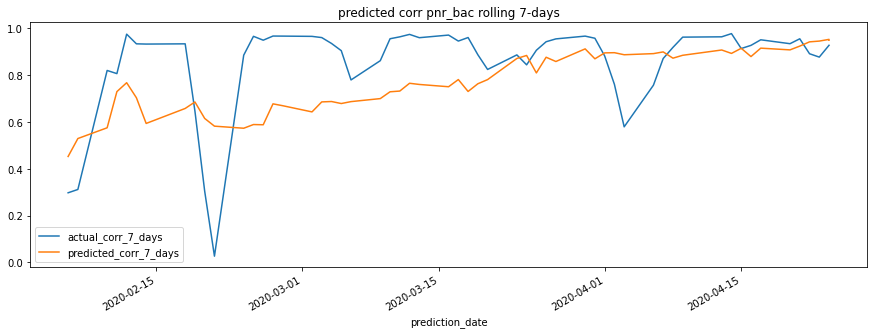

In [241]:
hist_predictions_df.set_index('prediction_date')[['actual_corr_7_days', 'predicted_corr_7_days']].plot(title='predicted corr pnr_bac rolling 7-days', figsize=(15,5))

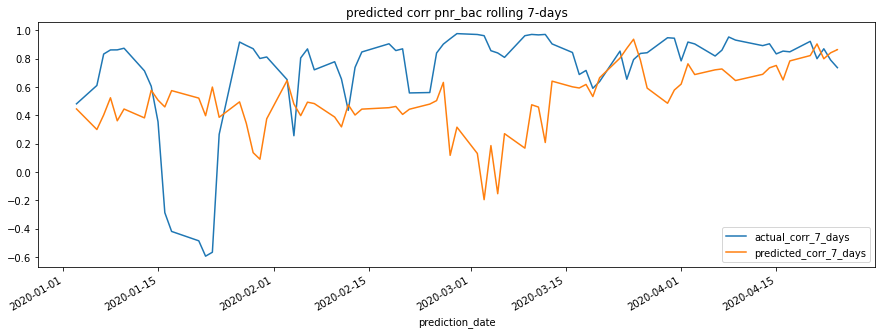

In [1374]:
hist_predictions_df.set_index('prediction_date')[['actual_corr_7_days', 'predicted_corr_7_days']].plot(title='predicted corr pnr_bac rolling 7-days', figsize=(15,5))

In [510]:
prediction_df.index

DatetimeIndex(['2019-11-20', '2019-11-21', '2019-11-22', '2019-11-25',
               '2019-11-26', '2019-11-27', '2019-11-29', '2019-12-02',
               '2019-12-03', '2019-12-04',
               ...
               '2020-04-03', '2020-04-06', '2020-04-07', '2020-04-08',
               '2020-04-09', '2020-04-13', '2020-04-14', '2020-04-15',
               '2020-04-16', '2020-04-16'],
              dtype='datetime64[ns]', name='prediction_date', length=102, freq=None)

## Feature Importances
- nit: only based on last tree fit

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

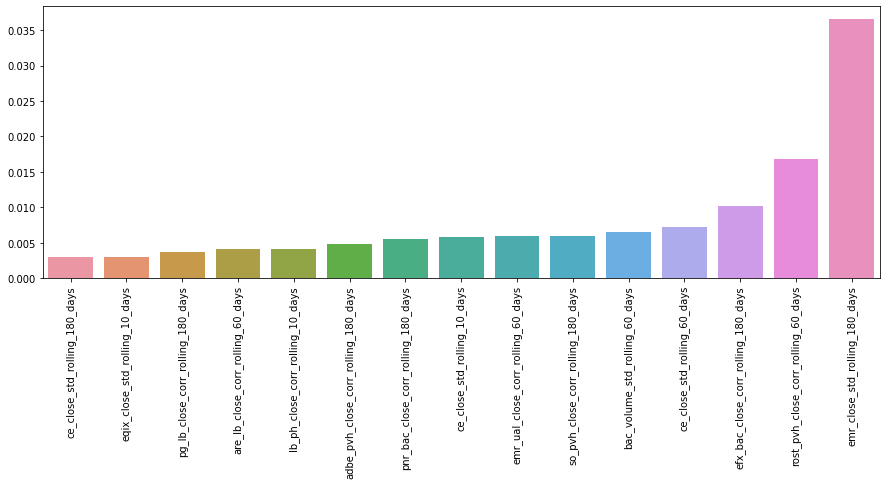

In [1301]:
cols = list(final_stock_df.columns)
cols.remove('pnr_bac_close_corr_rolling_7_days')

plt.figure(figsize=(15,5))
sns.barplot(x=np.array(cols)[np.argsort(rf.feature_importances_)][-15:], y=rf.feature_importances_[np.argsort(rf.feature_importances_)][-15:])
plt.xticks(rotation=90)

# given all feature, predict next 7-days for each stock pair

In [1182]:
final_stock_df.pnr_bac_close_corr_rolling_3_days.shift(-1).fillna(method='ffill')

date
2006-01-25    0.151438
2006-01-26    0.263368
2006-01-27   -0.675648
2006-01-30   -0.245173
2006-01-31    0.848353
                ...   
2020-04-20    0.928298
2020-04-21    0.979311
2020-04-22    0.992304
2020-04-23    0.985425
2020-04-24    0.985425
Name: pnr_bac_close_corr_rolling_3_days, Length: 3586, dtype: float64

In [1013]:
np.nan_to_num(final_stock_df.astype(np.float32)

array([[1.609430e-01, 8.503500e-02, 3.168980e-01, ..., 1.000000e+00,
        1.000000e+00, 2.006000e+03],
       [1.514380e-01, 8.503500e-02, 3.126760e-01, ..., 1.000000e+00,
        1.000000e+00, 2.006000e+03],
       [2.633680e-01, 6.827510e-01, 1.288730e-01, ..., 1.000000e+00,
        1.000000e+00, 2.006000e+03],
       ...,
       [6.691380e-01, 5.577040e-01, 9.487360e-01, ..., 4.000000e+00,
        2.000000e+00, 2.020000e+03],
       [9.991570e-01, 8.747000e-01, 1.176194e+00, ..., 4.000000e+00,
        2.000000e+00, 2.020000e+03],
       [9.890840e-01, 5.907060e-01, 9.345770e-01, ..., 4.000000e+00,
        2.000000e+00, 2.020000e+03]], dtype=float32)

- build predicted 7 day corr for each pair

In [1170]:
# remove all 7_days_corr columns ex: so_rost_close_corr_rolling_7_days
### format: f"{first_stock_name}_{second_stock_name}_close_corr_rolling_{n_days_stride}_days"
# using all data up until the last day, predict 7-day corr for each stock pair

In [ ]:
# undefined
find_pct_change_pred_vs_last_corr

In [1193]:
def most_recent_week_historical_prediction(final_stock_df):
    """
    Take the most recent week of data and use that to predict against 
    """

    test_date = final_stock_df.index.max() - datetime.timedelta(7)
    train_dates = final_stock_df.index[final_stock_df.index < test_date - datetime.timedelta(14)] # 14 days before

    train_df = final_stock_df[final_stock_df.index.isin(train_dates)]
    test_df = final_stock_df[final_stock_df.index == test_date]


    final_stock_df = final_stock_df.dropna()

    n_days_corr_predictions = 7


    pct_change_corr = []
    actual_corr = []
    predicted_corr = []
    last_corr_for_prediction_day = []
    pred_dates = []
    start = time.time()

    for stock_pairing in pairs_of_stocks:
        pred_col_name = f"{stock_pairing}_close_corr_rolling_{n_days_corr_predictions}_days"

        # remove the current 7-day corr for this stock
        # we can't use  test_X data because we will not have access to it
        train_X, train_y = train_df.loc[:, train_df.columns != f"{pred_col_name}"],  train_df[f"{pred_col_name}"].shift(-7).fillna(method='ffill')# shift back 7 days to get rolling corr
        
        test_X, test_y = test_df.loc[:, test_df.columns != f"{pred_col_name}"],  test_df[f"{pred_col_name}"].shift(-7).fillna(method='ffill') # test has the date we want to predict against


        train_X = np.nan_to_num(train_X.astype(np.float32)) 

        # standard scaler for cols
        scaler=StandardScaler()
        scaler.fit(train_X)
        train_X = scaler.transform(train_X)
        test_X = scaler.transform(test_X)


        # Make an instance of the Model
        # only train on train_x

        pca = PCA(n_components=5, whiten=True)
        pca.fit(train_X)

        train_X = pca.transform(train_X)
        test_X = pca.transform(test_X)
        # standaard scaler

        rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
        rf.fit(train_X, train_y)


        prediction = np.array(rf.predict(test_X))[0]
        print(f"Stocks {stock_pairing}")
        print(f"Prediction = {prediction}")
        print(f"Actual = {test_y.values[0]}")

        pred_corr_pct_change, last_date = find_pct_change_pred_vs_last_corr(train_y, prediction)

        last_corr_date = train_y.index.max()
        last_corr = train_y[train_y.index.max()]    

        pct_change_corr.append(pred_corr_pct_change)
        pred_dates.append(last_date)
        actual_corr.append(test_y.values[0])
        predicted_corr.append(prediction)
        last_corr_for_prediction_day.append(last_corr)

        print(f"{stock_pairing} pct change 7-day corr of close from {last_date} to {test_date} is =  {pred_corr_pct_change}")


    end = time.time()

    print(f"Predictions took {(end-start)/60} mins")
    
    pd.DataFrame({ 'pred_date_start':pred_dates,'stock_pair':pairs_of_stocks,   'pct_change_for_7_daycorr': pct_change_corr,
    'actual_corr': actual_corr,
    'predicted_corr': predicted_corr, 'last_7_day_corr_for_pred_date_start': last_corr_for_prediction_day}).to_csv(
    '../data/predictions/test_predictions_2020_04_17.csv', index=False)
    


In [1194]:
most_recent_week_historical_prediction(final_stock_df)

/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


ValueError: Number of labels=3586 does not match number of samples=3580

most_recent_week_historical_prediction

# Final Predictions

In [1199]:
# train on all data
# predict for the upcoming week
most_recent_date = final_stock_df.index.max()
prediction_end = most_recent_date + datetime.timedelta(7)
                                                       
                                                       
# train_dates = final_stock_df.index[final_stock_df.index < test_date - datetime.timedelta(7)] # seven days before

# train_df = final_stock_df[final_stock_df.index.isin(train_dates)]
test_df = final_stock_df[final_stock_df.index == most_recent_date]

final_stock_df = final_stock_df.dropna()

n_days_corr_predictions = 7


pct_change_corr = []
predicted_corr = []
last_corr_for_prediction_day = []
pred_dates = []
start = time.time()

for stock_pairing in tqdm(pairs_of_stocks):
    pred_col_name = f"{stock_pairing}_close_corr_rolling_{n_days_corr_predictions}_days"

    # remove the current 7-day corr for this stock
    # for 7 take rolling 7 days corr to the present day to predict off of
    train_X, train_y = final_stock_df.loc[:, final_stock_df.columns != f"{pred_col_name}"],  final_stock_df[f"{pred_col_name}"].shift(-7).fillna(method='ffill') 
                                                       # get corr from 7 days in the future
                                                       
    test_X, test_y = test_df.loc[:, test_df.columns != f"{pred_col_name}"],  test_df[f"{pred_col_name}"]

    train_X = np.nan_to_num(train_X.astype(np.float32)) 

    # standard scaler for cols
    scaler=StandardScaler()
    scaler.fit(train_X)
    train_X = scaler.transform(train_X)
    test_X = scaler.transform(test_X)


    # Make an instance of the Model
    # only train on train_x

    pca = PCA(n_components=5, whiten=True)
    pca.fit(train_X)

    train_X = pca.transform(train_X)
    test_X = pca.transform(test_X)

    # standaard scaler

    rf = RandomForestRegressor(n_estimators=200, n_jobs=-1)
    rf.fit(train_X, train_y)


    prediction = np.array(scaler.inverse_transform(rf.predict(test_X)))[0]
    print(f"Stocks {stock_pairing}")
    print(f"Prediction = {prediction}")

    pred_corr_pct_change, last_date = find_pct_change_pred_vs_last_corr(train_y, prediction)

    last_corr_date = train_y.index.max()
    last_corr = train_y[train_y.index.max()]  
    print(f"Last corr = {last_corr})

    pct_change_corr.append(pred_corr_pct_change)
    pred_dates.append(most_recent_date)
    predicted_corr.append(prediction)
    last_corr_for_prediction_day.append(last_corr)

    print(f"{stock_pairing} pct change 7-day corr of close from {most_recent_date} to {prediction_end} is =  {pred_corr_pct_change}")


end = time.time()

print(f"Predictions took {(end-start)/60} mins")
          
squarred_difference = (np.array(last_corr_for_prediction_day)-np.array(predicted_corr))**2

pd.DataFrame({ 'pred_date_start':pred_dates,'stock_pair':pairs_of_stocks,   
'predicted_corr': predicted_corr, 'last_7_day_corr_for_pred_date_start': last_corr_for_prediction_day, 
              'pct_change_for_7_day_corr': pct_change_corr, 'squarred_diff_7_day_cor': (last_corr_for_prediction_day-predicted_corr)**2
             }).to_csv(
f'../data/predictions/test_predictions_{most_recent_date}-{prediction_end}.csv', index=False)


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks eqix_rost
Prediction = 0.4904762900000012
eqix_rost pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.052783483453324065


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks eqix_so
Prediction = 0.733176166361472
eqix_so pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.038210259474603325


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks eqix_emr
Prediction = 0.1659966600000001
eqix_emr pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.37602403945786955


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks eqix_atvi
Prediction = 0.32267243000000007
eqix_atvi pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.03628953208112917


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks eqix_ce
Prediction = 0.469236265
eqix_ce pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.08519529726905495


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks eqix_cern
Prediction = 0.3486951899999996
eqix_cern pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.052273993354919224


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks eqix_peg
Prediction = 0.6321054790476177
eqix_peg pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.04887485302043415


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks eqix_adbe
Prediction = 0.34310693500000033
eqix_adbe pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.07040286703687637


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks eqix_rop
Prediction = 0.19616649785714255
eqix_rop pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.4305356882412239


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks eqix_are
Prediction = 0.5941640399999989
eqix_are pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.032617605961805296


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks eqix_pg
Prediction = 0.46575068583333395
eqix_pg pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.044533620605355595


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks eqix_pvh
Prediction = 0.5548192649999986
eqix_pvh pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.06984587103361461


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks eqix_lb
Prediction = 0.12162476500000013
eqix_lb pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  2.8199932472753586


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks eqix_vno
Prediction = 0.6034189300000008
eqix_vno pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.05862293992474088


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks eqix_ual
Prediction = 0.06448574500000015
eqix_ual pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -3.2205070417685393


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks eqix_efx
Prediction = 0.20207063658333316
eqix_efx pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.14863114307585223


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks eqix_ph
Prediction = 0.4323118199999994
eqix_ph pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.05752458438927821


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks eqix_pnr
Prediction = 0.4227229000000003
eqix_pnr pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.03374751706907797


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks eqix_bac
Prediction = 0.4247395647500001
eqix_bac pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.0012766791686902312


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks eqix_ni
Prediction = 0.8941638652222257
eqix_ni pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.0792124845562332


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks rost_so
Prediction = 0.21990010499999954
rost_so pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.03737719186515309


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks rost_emr
Prediction = -0.23724889750000064
rost_emr pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.41305389662278513


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks rost_atvi
Prediction = 0.4583372699999997
rost_atvi pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.1402511508030303


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks rost_ce
Prediction = 0.1948732000000006
rost_ce pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.009904540790417915


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks rost_cern
Prediction = 0.011006559999999886
rost_cern pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -1.0977674344238257


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks rost_peg
Prediction = 0.8518622250000005
rost_peg pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.13897474422807465


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks rost_adbe
Prediction = 0.6891971224999998
rost_adbe pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.06981150175052198


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks rost_rop
Prediction = 0.5672406608750014
rost_rop pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.015155843304605954


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks rost_are
Prediction = 0.8032846697500001
rost_are pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.14602781097013207


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks rost_pg
Prediction = 0.8257134524999973
rost_pg pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.08686279112202544


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks rost_pvh
Prediction = 0.8545875191666663
rost_pvh pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.052152852104774605


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks rost_lb
Prediction = 0.6600268449999994
rost_lb pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.1211465574979802


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks rost_vno
Prediction = 0.790420263025975
rost_vno pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.15859837086298412


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks rost_ual
Prediction = 0.6563855932797601
rost_ual pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.045315641401165174


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks rost_efx
Prediction = -0.30160936499999996
rost_efx pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.40479158485107425


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks rost_ph
Prediction = 0.4430279300000005
rost_ph pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.025740533455895


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks rost_pnr
Prediction = 0.5262136550000007
rost_pnr pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.21975840865686758


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks rost_bac
Prediction = 0.7000987174999991
rost_bac pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.06753837204501412


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks rost_ni
Prediction = 0.550845014999999
rost_ni pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.11876218442090059


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks so_emr
Prediction = 0.644107554999999
so_emr pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.0744530557347759


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks so_atvi
Prediction = -0.0019361949999999928
so_atvi pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.9772463981009237


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks so_ce
Prediction = 0.5631804408333345
so_ce pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.33258304683892137


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks so_cern
Prediction = 0.6650118799999986
so_cern pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.15410109901292535


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks so_peg
Prediction = 0.3301729466666666
so_peg pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.1343342769715623


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks so_adbe
Prediction = 0.2485024400000002
so_adbe pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.02005377293046129


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks so_rop
Prediction = 0.05655679000000038
so_rop pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  23.729685177088054


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks so_are
Prediction = 0.25948353666666574
so_are pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.14846722640476284


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks so_pg
Prediction = 0.15343280000000042
so_pg pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  2.3486719483183927


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks so_pvh
Prediction = 0.4888235350000012
so_pvh pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.030271265709934436


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks so_lb
Prediction = -0.1102610250000001
so_lb pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.661005460263974


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks so_vno
Prediction = 0.21748938333333345
so_vno pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.24812418341912879


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks so_ual
Prediction = -0.29028128333333403
so_ual pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.3449267856390613


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks so_efx
Prediction = 0.49598298944444363
so_efx pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.23975863126654484


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks so_ph
Prediction = 0.6811356925000002
so_ph pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.03692509095073715


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks so_pnr
Prediction = 0.4932221602373746
so_pnr pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.03272892673942196


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks so_bac
Prediction = 0.5145850299999998
so_bac pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.046819435685659716


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks so_ni
Prediction = 0.66379865
so_ni pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.11399715165121471


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks emr_atvi
Prediction = -0.4217586050000005
emr_atvi pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.330036765815495


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks emr_ce
Prediction = 0.7603664370000003
emr_ce pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.026702306755910565


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks emr_cern
Prediction = 0.6217694373333345
emr_cern pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.2757077138551478


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks emr_peg
Prediction = -0.16651055500000012
emr_peg pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.5303462947658788


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks emr_adbe
Prediction = -0.03371865499999987
emr_adbe pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.741455063373641


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks emr_rop
Prediction = 0.08401767166666668
emr_rop pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -1.5430374724768074


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks emr_are
Prediction = -0.2697536449999993
emr_are pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.381375597976399


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks emr_pg
Prediction = -0.39718859500000003
emr_pg pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.2653824763165974


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks emr_pvh
Prediction = 0.01661339500000004
emr_pvh pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -1.391004612958649


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks emr_lb
Prediction = -0.3919355958531752
emr_lb pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.38478699324382726


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks emr_vno
Prediction = -0.29158698916666553
emr_vno pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.42400863400068045


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks emr_ual
Prediction = -0.47188976384004744
emr_ual pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.3876349090191209


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks emr_efx
Prediction = 0.7917727200000012
emr_efx pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.10612534094398451


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks emr_ph
Prediction = 0.5867001965873004
emr_ph pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.04175764642629565


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks emr_pnr
Prediction = 0.28334921500000115
emr_pnr pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.321813434158726


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks emr_bac
Prediction = 0.2610585750000008
emr_bac pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.4099232817377634


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks emr_ni
Prediction = 0.15953573999999945
emr_ni pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  1.559698039341518


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks atvi_ce
Prediction = -0.28123215499999965
atvi_ce pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.2067442860809704


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks atvi_cern
Prediction = -0.08491582499999999
atvi_cern pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.5545492815888454


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks atvi_peg
Prediction = 0.48754738000000086
atvi_peg pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.07324655328741991


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks atvi_adbe
Prediction = 0.5857067250000009
atvi_adbe pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.025399353712573736


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks atvi_rop
Prediction = -0.05931718500000031
atvi_rop pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.02495438287284757


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks atvi_are
Prediction = 0.5434620400000015
atvi_are pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.17528811542827083


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks atvi_pg
Prediction = 0.4368212125000008
atvi_pg pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.14557125642189161


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks atvi_pvh
Prediction = 0.13358572499999977
atvi_pvh pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.20656126940004782


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks atvi_lb
Prediction = 0.12019904875000004
atvi_lb pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.31935191398397444


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks atvi_vno
Prediction = 0.48386468000000143
atvi_vno pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.23578070880629765


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks atvi_ual
Prediction = 0.23048484
atvi_ual pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.17472361269254721


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks atvi_efx
Prediction = -0.4406528350000006
atvi_efx pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.3106656691341638


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks atvi_ph
Prediction = -0.3113201362500008
atvi_ph pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.0518389837090073


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks atvi_pnr
Prediction = 0.17588120499999993
atvi_pnr pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.27569635709226314


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks atvi_bac
Prediction = -0.05644316000000019
atvi_bac pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.2961848471245425


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks atvi_ni
Prediction = 0.46114384571428707
atvi_ni pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.05758226576823533


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks ce_cern
Prediction = 0.6279378199999981
ce_cern pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.2507513274230714


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks ce_peg
Prediction = 0.2376172716666675
ce_peg pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.028539596944098133


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks ce_adbe
Prediction = 0.3315532103781215
ce_adbe pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.028515140196253785


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks ce_rop
Prediction = 0.2994361424999995
ce_rop pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.273356477642404


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks ce_are
Prediction = 0.13863538999999975
ce_are pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.3171382832169469


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks ce_pg
Prediction = 0.04973675499999994
ce_pg pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.6566217566532304


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks ce_pvh
Prediction = 0.5107535070000012
ce_pvh pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.02821162294679369


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks ce_lb
Prediction = -0.14027576999999977
ce_lb pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.2406032373321797


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks ce_vno
Prediction = 0.16427665583333284
ce_vno pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.3699082359056425


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks ce_ual
Prediction = -0.2233633999999994
ce_ual pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.43384078028206285


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks ce_efx
Prediction = 0.47156907499999984
ce_efx pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.1485602122600207


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks ce_ph
Prediction = 0.7577104962499994
ce_ph pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.09932221726277224


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks ce_pnr
Prediction = 0.6394122950000013
ce_pnr pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.08445596051523596


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks ce_bac
Prediction = 0.666860249999998
ce_bac pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.01503271008121665


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks ce_ni
Prediction = 0.4711204891666677
ce_ni pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.017958858274826794


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks cern_peg
Prediction = 0.05569212500000007
cern_peg pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -1.7641410087538771


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks cern_adbe
Prediction = 0.3742160050000008
cern_adbe pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.12237303360676877


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks cern_rop
Prediction = -0.09543519750000012
cern_rop pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.48462993714156044


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks cern_are
Prediction = -0.0011285850000000409
cern_are pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.9916245389576172


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks cern_pg
Prediction = -0.20800461999999936
cern_pg pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.48639185949178776


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks cern_pvh
Prediction = 0.17856621000000028
cern_pvh pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.3694462892946728


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks cern_lb
Prediction = -0.46241055000000075
cern_lb pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.2465030162004661


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks cern_vno
Prediction = -0.08716199499999976
cern_vno pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.5001978577121802


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks cern_ual
Prediction = -0.3813038275000001
cern_ual pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.49506748587712757


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks cern_efx
Prediction = 0.5715341449999991
cern_efx pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.05986694992343011


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks cern_ph
Prediction = 0.4274620833333339
cern_ph pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.2050175128634295


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks cern_pnr
Prediction = 0.45950357499999916
cern_pnr pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.19570325969568392


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks cern_bac
Prediction = 0.26165834500000046
cern_bac pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.020309397543382568


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks cern_ni
Prediction = 0.4041631950000012
cern_ni pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.14712524160794138


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks peg_adbe
Prediction = 0.6401821650000009
peg_adbe pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.10423942883528159


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks peg_rop
Prediction = 0.5739525850000017
peg_rop pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.04822832301885516


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks peg_are
Prediction = 0.8003766286250013
peg_are pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.17148964525906063


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks peg_pg
Prediction = 0.7980078349999995
peg_pg pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.1256126841893046


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks peg_pvh
Prediction = 0.7551129499999982
peg_pvh pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.163792481016501


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks peg_lb
Prediction = 0.6519355649999988
peg_lb pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.07470039754913471


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks peg_vno
Prediction = 0.8122599100000015
peg_vno pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.14101109348561602


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks peg_ual
Prediction = 0.6056308012500016
peg_ual pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.04724697127727606


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks peg_efx
Prediction = -0.30721160499999955
peg_efx pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.281685531841267


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks peg_ph
Prediction = 0.5019119161553024
peg_ph pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.007733839608284887


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks peg_pnr
Prediction = 0.5732924149999981
peg_pnr pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.13645824954623453


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks peg_bac
Prediction = 0.7545537524999985
peg_bac pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.020896749920199964


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks peg_ni
Prediction = 0.6790470217261896
peg_ni pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.029186686730387712


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks adbe_rop
Prediction = 0.348883475
adbe_rop pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.1674278395706179


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks adbe_are
Prediction = 0.6212923612500022
adbe_are pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.10488729012208398


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks adbe_pg
Prediction = 0.43785611750000053
adbe_pg pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.021329278163430443


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks adbe_pvh
Prediction = 0.5964366400000003
adbe_pvh pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.028259805598730092


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks adbe_lb
Prediction = 0.2696027133333336
adbe_lb pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.08210978709882344


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks adbe_vno
Prediction = 0.6148896812500021
adbe_vno pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.09716314289112027


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks adbe_ual
Prediction = 0.24561088904545425
adbe_ual pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.2365495405709941


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks adbe_efx
Prediction = -0.2340051966666659
adbe_efx pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.4992752562591003


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks adbe_ph
Prediction = 0.37644949823412793
adbe_ph pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.06016727891667606


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks adbe_pnr
Prediction = 0.7804523994444443
adbe_pnr pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.12955586300855848


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks adbe_bac
Prediction = 0.46163156000000144
adbe_bac pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.15479339992969032


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks adbe_ni
Prediction = 0.49007275500000136
adbe_ni pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.0010862317967266222


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks rop_are
Prediction = 0.6014681549999992
rop_are pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.01166317653826221


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks rop_pg
Prediction = 0.6421209300000014
rop_pg pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.06039562771164353


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks rop_pvh
Prediction = 0.5651692137499985
rop_pvh pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.006990185676153615


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks rop_lb
Prediction = 0.6220564400000004
rop_lb pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.05316781001754922


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks rop_vno
Prediction = 0.527347594999999
rop_vno pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.08718461503572561


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks rop_ual
Prediction = 0.5244090399999984
rop_ual pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.017200494015037093


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks rop_efx
Prediction = -0.1214704399999997
rop_efx pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.3762205686760862


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks rop_ph
Prediction = 0.5533406500000013
rop_ph pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.019468056640916886


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks rop_pnr
Prediction = 0.3851276099999994
rop_pnr pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.10835425078494243


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks rop_bac
Prediction = 0.6907107236666683
rop_bac pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.06763147559955307


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks rop_ni
Prediction = 0.21800259499999963
rop_ni pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.41217170637542333


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks are_pg
Prediction = 0.7091248699404747
are_pg pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.18525482448668062


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks are_pvh
Prediction = 0.6861528496428566
are_pvh pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.11165090007152267


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks are_lb
Prediction = 0.610098925000001
are_lb pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.033734730336917096


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks are_vno
Prediction = 0.8729070408333347
are_vno pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.046104357425131304


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks are_ual
Prediction = 0.5770915229166653
are_ual pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.04144308384354356


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks are_efx
Prediction = -0.375408381904762
are_efx pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.17355891859547345


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks are_ph
Prediction = 0.3671087086666672
are_ph pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.03394733107198189


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks are_pnr
Prediction = 0.5175726349999988
are_pnr pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.06809490413978081


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks are_bac
Prediction = 0.6280003050000014
are_bac pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.038054565868719914


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks are_ni
Prediction = 0.6800545300000028
are_ni pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.023978733053750312


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks pg_pvh
Prediction = 0.7597436100000007
pg_pvh pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.06772833025334368


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks pg_lb
Prediction = 0.696864615000001
pg_lb pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.20499431865500328


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks pg_vno
Prediction = 0.7628703433333321
pg_vno pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.15706517851782653


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks pg_ual
Prediction = 0.7218033840476192
pg_ual pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.13477004140615478


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks pg_efx
Prediction = -0.30985306500000076
pg_efx pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.384212740121863


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks pg_ph
Prediction = 0.3533637949999999
pg_ph pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.020521677477487676


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks pg_pnr
Prediction = 0.3743957699999996
pg_pnr pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.025617467253455373


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks pg_bac
Prediction = 0.6834434889999988
pg_bac pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.018402025647672238


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks pg_ni
Prediction = 0.519617044999999
pg_ni pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.001092467007030029


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks pvh_lb
Prediction = 0.6340399149999986
pvh_lb pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.032062196011861


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks pvh_vno
Prediction = 0.7152591599999998
pvh_vno pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.10663069503928801


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks pvh_ual
Prediction = 0.5536566199999996
pvh_ual pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.05832344761012642


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks pvh_efx
Prediction = 0.05193920666666636
pvh_efx pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -1.306270604098607


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks pvh_ph
Prediction = 0.6687546869999987
pvh_ph pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.09116093167752681


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks pvh_pnr
Prediction = 0.6724725421428586
pvh_pnr pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.09758486115946141


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks pvh_bac
Prediction = 0.8257734036363641
pvh_bac pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.09528278129376755


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks pvh_ni
Prediction = 0.593851546666668
pvh_ni pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.07611143782003005


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks lb_vno
Prediction = 0.6600585050000002
lb_vno pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.03252408948065777


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks lb_ual
Prediction = 0.9210698381363639
lb_ual pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.051411612749499125


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks lb_efx
Prediction = -0.40730023500000073
lb_efx pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.36622749976659397


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks lb_ph
Prediction = 0.2286953900000009
lb_ph pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.10776268115942456


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks lb_pnr
Prediction = 0.22474820178571442
lb_pnr pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.0210590427613786


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks lb_bac
Prediction = 0.541351450000002
lb_bac pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.035943529788878825


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks lb_ni
Prediction = 0.14354808000000024
lb_ni pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  1.2434996249062302


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks vno_ual
Prediction = 0.5731713349999992
vno_ual pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.0989770472887801


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks vno_efx
Prediction = -0.35416522000000084
vno_efx pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.38436455733168173


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks vno_ph
Prediction = 0.25165096500000056
vno_ph pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.03778136136304322


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks vno_pnr
Prediction = 0.5317167300000019
vno_pnr pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.10243934017778156


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks vno_bac
Prediction = 0.5592700799999984
vno_bac pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.04188802527235036


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks vno_ni
Prediction = 0.70423066
vno_ni pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.004492931246280363


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks ual_efx
Prediction = -0.41203327000000073
ual_efx pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.41245373446764233


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks ual_ph
Prediction = 0.11565809500000032
ual_ph pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  5.518152333183066


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks ual_pnr
Prediction = 0.10783189500000007
ual_pnr pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.961221763486233


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks ual_bac
Prediction = 0.4217696766666669
ual_bac pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.09231099865501657


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks ual_ni
Prediction = 0.1545651649999997
ual_ni pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  11.009725330225308


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks efx_ph
Prediction = 0.4128700850000006
efx_ph pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.03400961848921025


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks efx_pnr
Prediction = 0.014629165000000008
efx_pnr pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -1.092607235551054


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks efx_bac
Prediction = 0.1267292399999998
efx_bac pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  3.476166996326639


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks efx_ni
Prediction = 0.17331556000000023
efx_ni pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  1.1824857704125349


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks ph_pnr
Prediction = 0.626711879000002
ph_pnr pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.033140007682893824


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks ph_bac
Prediction = 0.8677373774999991
ph_bac pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.04588989722619674


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks ph_ni
Prediction = 0.46223204999999845
ph_ni pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.08841152854468248


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks pnr_bac
Prediction = 0.6704556962500017
pnr_bac pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  -0.09029201283308752


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks pnr_ni
Prediction = 0.5435271799999987
pnr_ni pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.011753587496949214


/Users/jonathanhilgart/Library/Caches/pypoetry/virtualenvs/daily-trading-nJ43NNNI-py3.7/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1546: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


Stocks bac_ni
Prediction = 0.49263338750000135
bac_ni pct change 7-day corr of close from 2020-04-24 00:00:00 to 2020-05-01 00:00:00 is =  0.04976876712737743
Predictions took 4.341181615988414 mins


In [1203]:
(np.array([.5,2,3]) - np.array([4,5,6]))**2

array([12.25,  9.  ,  9.  ])